# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [31]:
# Load dataset
file_path = 'House Price Prediction Dataset.csv'
df = pd.read_csv(file_path)

print("Shape:", df.shape)

Shape: (2000, 10)


In [33]:
print("Columns:", df.columns)

Columns: Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [35]:
print(df.head())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


# Preprocessing

In [38]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [44]:
# Drop or fill missing values
df = df.dropna()

In [46]:
# Handle categorical variables (like 'location')
df_encoded = pd.get_dummies(df, drop_first=True)

In [48]:
# After loading the DataFrame
print(df.columns)

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')


In [50]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

In [52]:
# Confirm column names
print(df.columns)

Index(['id', 'area', 'bedrooms', 'bathrooms', 'floors', 'yearbuilt',
       'location', 'condition', 'garage', 'price'],
      dtype='object')


In [54]:
# Now continue with preprocessing
df_encoded = pd.get_dummies(df, drop_first=True)

In [56]:
# Use the correct column name
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [60]:
# Optionally scale the features (especially important for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Regression Model

### Linear Regression

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

### Gradient Boosting

In [23]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluate the Model

In [25]:
def evaluate_model(true, predicted, model_name="Model"):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} RMSE: {rmse:.2f}")

evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, gb_preds, "Gradient Boosting")

Linear Regression MAE: 242867.45
Linear Regression RMSE: 279785.21
Gradient Boosting MAE: 243241.96
Gradient Boosting RMSE: 283820.05


# Visualize Predictions vs Actual

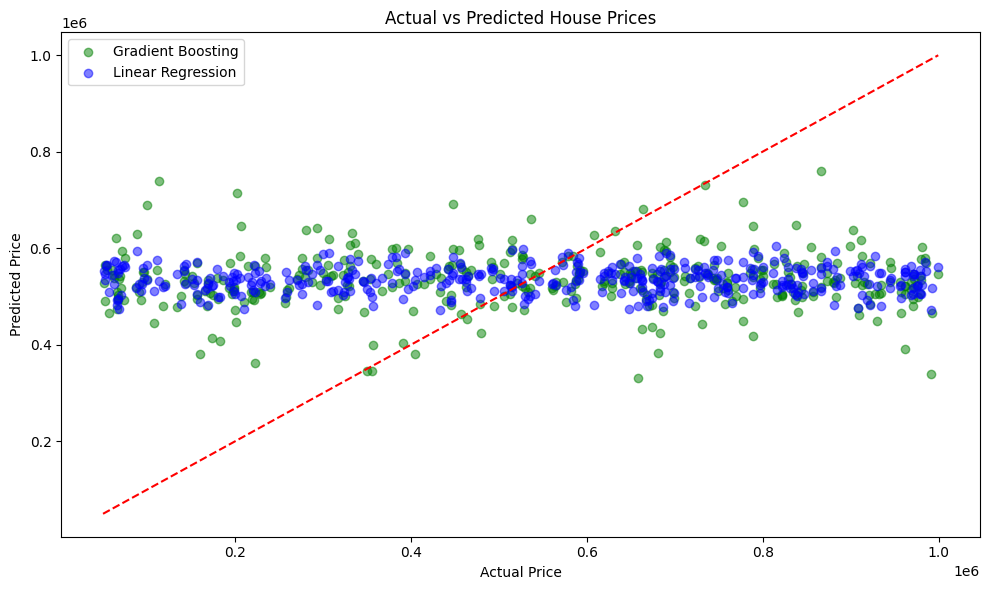

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_preds, alpha=0.5, color='green', label='Gradient Boosting')
plt.scatter(y_test, lr_preds, alpha=0.5, color='blue', label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.tight_layout()
plt.show()